In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/'

Mounted at /content/drive


## data tcode balance

### Import data

In [ ]:
buzz_df_sample = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_sample_balanced.csv')
non_buzz_df_sample = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/non_buzz_df_sample_balanced.csv')

buzz_df_sample['label'] = 1
non_buzz_df_sample['label'] = 0

df_train = pd.concat([buzz_df_sample, non_buzz_df_sample])
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_train

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,label
0,mahasiswa ngajak debat di jalanan? pilih ganja...,2024-01-03 11:33:50+00:00,@gFldz8594a1/3rwZT40ovrELxMrSQ88OK94V0gw0Bos=,mention,0,90.000000,26.000000,1153.000000,PANGKALPINANG,0.000000,id,1,-,1
1,"betul top, bersama pbowogbran yespasti rakyat ...",2024-01-20 12:12:34+00:00,@hheI7wQBnWCiwxRLDt+NwDuvRZSS98LkJFqqbZl5iZk=,reply,0,21.000000,9.000000,94.000000,-,0.000000,id,1,-,0
2,"pemilu bukan hanya tentang memilih, tapi juga ...",2024-01-21 05:10:13+00:00,@Vdkp2WMtFHaJbA965/Uod3I/gZENqoPcbRvMgezvfwc=,mention,0,0.000000,9.500000,5741.000000,-,0.000000,id,2,-,1
3,ganjar-mahfud membangun kepercayaan generasi m...,2024-01-04 09:22:17+00:00,@7hXgNNxvPb7+D1i+GbLEuSqGVgZ7RoouD0gyRcIymaE=,mention,0,21.000000,10.000000,1048.000000,Jakarta Barat,0.000000,id,1,-,1
4,rt aslinya acara model desak anies itu bukan m...,2024-01-24 04:36:05+00:00,@5RYtLW+5dh+Qgme5cLz/YI2n2/WzEd19VvyPzDzHxww=,rt,4,552.333333,2382.333333,20532.666667,-,1.000000,id,3,munierlicious,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,gaspoll terus buat ganjar-mahfud,2024-01-09 05:02:28+00:00,@l3CIrk9ku4KqNKh/okUPRZFOa9HuvTddzVNHO1ZRgN8=,reply,0,721.000000,741.000000,5283.000000,"Cibinong, Indonesia",0.000000,id,1,-,0
5996,"rt kalau anies - imin menang, dan prabowo - gi...",2024-01-06 17:37:22+00:00,@65lSfpSUUk0jbCS9d7zyL+/mNGyo85LFF1z9efYXY/g=,rt,9,372.000000,4025.750000,16710.000000,-,3.875000,id,8,smile_funcourse,0
5997,"rt tidak lagi di tepi jurang, tapi obrolan nya...",2024-01-29 14:22:56+00:00,@eSp3yoymgWrqkI7fMPBERjhEZmn/DPEnnyD1y9ayvoU=,rt,1278,751.823232,1463.222222,25528.570707,-,1.387879,id,990,BangPino__,0
5998,"betul faktanya, masbowogbran palingsejuk seora...",2024-01-17 08:22:59+00:00,@iXaNbHdVVuWsZz4kRjJcnEdBDJ0eBnGK+lgkzuNG3ts=,mention,0,126.000000,102.000000,176.000000,-,0.000000,id,1,-,0


In [ ]:
df_train['tcode'].value_counts()

tcode
mention    2000
reply      2000
rt         2000
Name: count, dtype: int64

### Preprocess Features

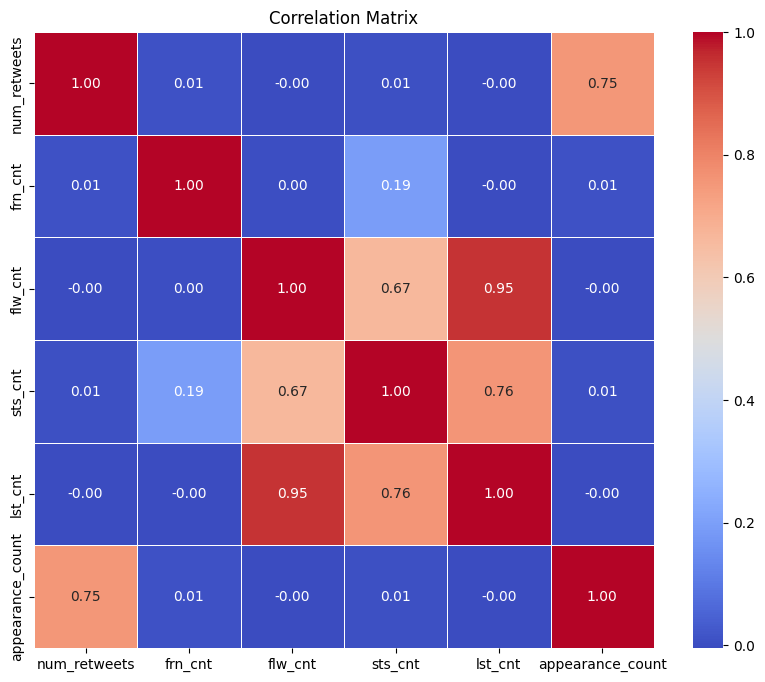

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train[['num_retweets', 'frn_cnt', 'flw_cnt', 'sts_cnt', 'lst_cnt', 'appearance_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


temp_df = df_train[['flw_cnt', 'lst_cnt']]
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(temp_df)

# Apply PCA
pca = PCA(n_components=1)  # Combine into 2 component
combined_flw_lst = pca.fit_transform(scaled_data)

# Convert PCA result back to DataFrame
print(pca.explained_variance_ratio_)

[0.97503353]


In [ ]:
df_train['combined_flw_lst'] = combined_flw_lst
df_train.head()

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,label,combined_flw_lst
0,mahasiswa ngajak debat di jalanan? pilih ganja...,2024-01-03 11:33:50+00:00,@gFldz8594a1/3rwZT40ovrELxMrSQ88OK94V0gw0Bos=,mention,0,90.000000,26.000000,1153.000000,PANGKALPINANG,0.0,id,1,-,1,-0.068540
1,"betul top, bersama pbowogbran yespasti rakyat ...",2024-01-20 12:12:34+00:00,@hheI7wQBnWCiwxRLDt+NwDuvRZSS98LkJFqqbZl5iZk=,reply,0,21.000000,9.000000,94.000000,-,0.0,id,1,-,0,-0.068572
2,"pemilu bukan hanya tentang memilih, tapi juga ...",2024-01-21 05:10:13+00:00,@Vdkp2WMtFHaJbA965/Uod3I/gZENqoPcbRvMgezvfwc=,mention,0,0.000000,9.500000,5741.000000,-,0.0,id,2,-,1,-0.068571
3,ganjar-mahfud membangun kepercayaan generasi m...,2024-01-04 09:22:17+00:00,@7hXgNNxvPb7+D1i+GbLEuSqGVgZ7RoouD0gyRcIymaE=,mention,0,21.000000,10.000000,1048.000000,Jakarta Barat,0.0,id,1,-,1,-0.068570
4,rt aslinya acara model desak anies itu bukan m...,2024-01-24 04:36:05+00:00,@5RYtLW+5dh+Qgme5cLz/YI2n2/WzEd19VvyPzDzHxww=,rt,4,552.333333,2382.333333,20532.666667,-,1.0,id,3,munierlicious,0,-0.061842


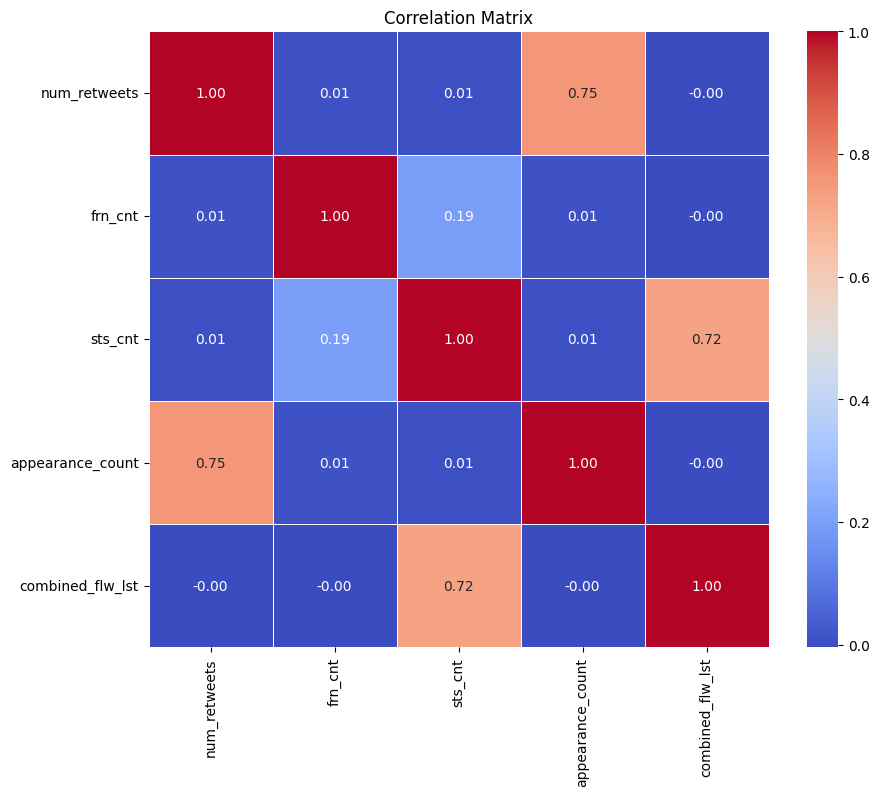

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train[['num_retweets', 'frn_cnt', 'sts_cnt', 'appearance_count', 'combined_flw_lst']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_train_graf = pd.read_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/df_train_graf.pkl')
df_train_graf.columns

Index(['index_value', 'label', 'degree_centrality', 'eigenvector_centrality',
       'pagerank', 'num_neighbors_list', 'total_appearance_count_list'],
      dtype='object')

In [ ]:
combined_df_train = pd.concat([df_train, df_train_graf], axis=1)
combined_df_train

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,...,nama_re,label,combined_flw_lst,index_value,label,degree_centrality,eigenvector_centrality,pagerank,num_neighbors_list,total_appearance_count_list
0,mahasiswa ngajak debat di jalanan? pilih ganja...,2024-01-03 11:33:50+00:00,@gFldz8594a1/3rwZT40ovrELxMrSQ88OK94V0gw0Bos=,mention,0,90.000000,26.000000,1153.000000,PANGKALPINANG,0.000000,...,-,1,-0.068540,1020690,1,0.000000e+00,3.166712e-33,3.865186e-07,0,0
1,"betul top, bersama pbowogbran yespasti rakyat ...",2024-01-20 12:12:34+00:00,@hheI7wQBnWCiwxRLDt+NwDuvRZSS98LkJFqqbZl5iZk=,reply,0,21.000000,9.000000,94.000000,-,0.000000,...,-,0,-0.068572,237394,0,1.850825e-06,3.394179e-22,7.180145e-07,4,4
2,"pemilu bukan hanya tentang memilih, tapi juga ...",2024-01-21 05:10:13+00:00,@Vdkp2WMtFHaJbA965/Uod3I/gZENqoPcbRvMgezvfwc=,mention,0,0.000000,9.500000,5741.000000,-,0.000000,...,-,1,-0.068571,1307960,1,9.716833e-06,3.266378e-16,1.422943e-06,21,34
3,ganjar-mahfud membangun kepercayaan generasi m...,2024-01-04 09:22:17+00:00,@7hXgNNxvPb7+D1i+GbLEuSqGVgZ7RoouD0gyRcIymaE=,mention,0,21.000000,10.000000,1048.000000,Jakarta Barat,0.000000,...,-,1,-0.068570,596500,1,0.000000e+00,3.166712e-33,3.865186e-07,0,0
4,rt aslinya acara model desak anies itu bukan m...,2024-01-24 04:36:05+00:00,@5RYtLW+5dh+Qgme5cLz/YI2n2/WzEd19VvyPzDzHxww=,rt,4,552.333333,2382.333333,20532.666667,-,1.000000,...,munierlicious,0,-0.061842,1496986,0,0.000000e+00,3.166712e-33,3.865186e-07,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,gaspoll terus buat ganjar-mahfud,2024-01-09 05:02:28+00:00,@l3CIrk9ku4KqNKh/okUPRZFOa9HuvTddzVNHO1ZRgN8=,reply,0,721.000000,741.000000,5283.000000,"Cibinong, Indonesia",0.000000,...,-,0,-0.067180,621985,0,4.627063e-07,5.188342e-29,7.798188e-07,1,1
5996,"rt kalau anies - imin menang, dan prabowo - gi...",2024-01-06 17:37:22+00:00,@65lSfpSUUk0jbCS9d7zyL+/mNGyo85LFF1z9efYXY/g=,rt,9,372.000000,4025.750000,16710.000000,-,3.875000,...,smile_funcourse,0,-0.052347,1565897,0,0.000000e+00,3.166712e-33,3.865186e-07,0,0
5997,"rt tidak lagi di tepi jurang, tapi obrolan nya...",2024-01-29 14:22:56+00:00,@eSp3yoymgWrqkI7fMPBERjhEZmn/DPEnnyD1y9ayvoU=,rt,1278,751.823232,1463.222222,25528.570707,-,1.387879,...,BangPino__,0,-0.062731,1660666,0,0.000000e+00,3.166712e-33,3.865186e-07,0,0
5998,"betul faktanya, masbowogbran palingsejuk seora...",2024-01-17 08:22:59+00:00,@iXaNbHdVVuWsZz4kRjJcnEdBDJ0eBnGK+lgkzuNG3ts=,mention,0,126.000000,102.000000,176.000000,-,0.000000,...,-,0,-0.068395,234059,0,2.313532e-06,3.834393e-19,5.296871e-07,5,5


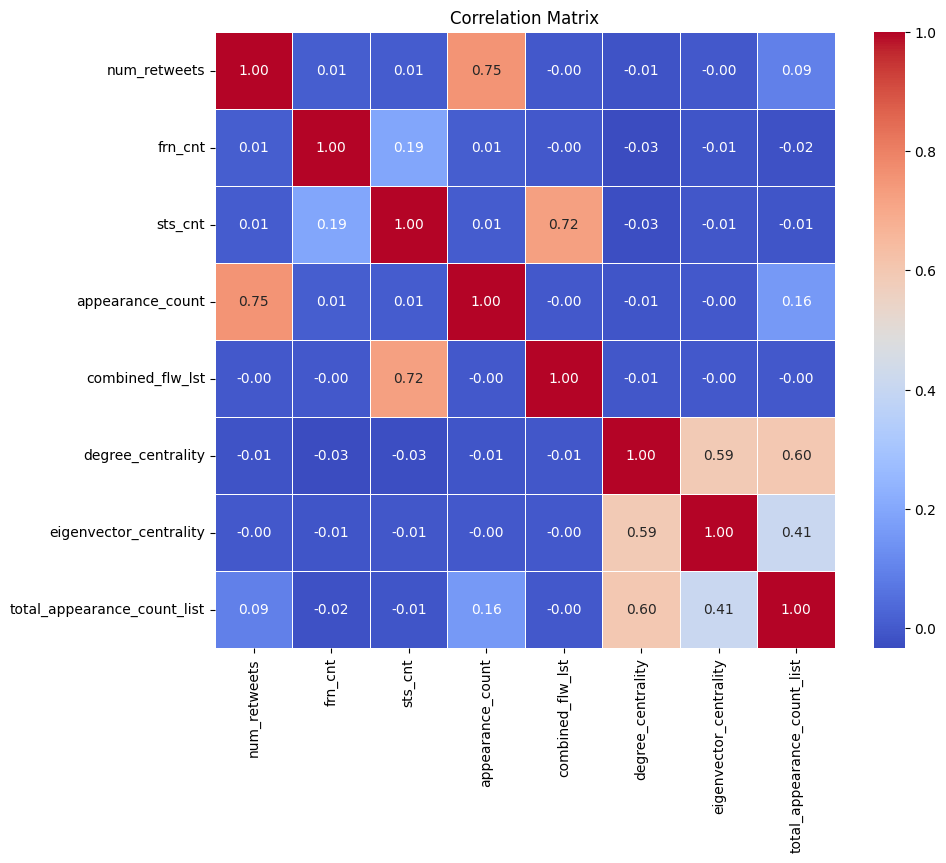

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = combined_df_train[['num_retweets', 'frn_cnt', 'sts_cnt', 'appearance_count', 'combined_flw_lst', 'degree_centrality', 'eigenvector_centrality', 'total_appearance_count_list']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Perform one-hot encoding on categorical variable 'category'
temp_df = combined_df_train[['tcode', 'num_retweets', 'frn_cnt', 'sts_cnt', 'appearance_count', 'combined_flw_lst', 'degree_centrality', 'eigenvector_centrality', 'total_appearance_count_list']]
# temp_df = combined_df_train[['tcode', 'num_retweets', 'frn_cnt', 'sts_cnt', 'appearance_count', 'combined_flw_lst']]
df_train_encoded = pd.get_dummies(temp_df, columns=['tcode'], drop_first=True)

y = df_train['label']
X = df_train_encoded.astype(float)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

### Model XBG

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=2)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 0.9125

Accuracy: 0.9241666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       600
           1       0.95      0.89      0.92       600

    accuracy                           0.92      1200
   macro avg       0.93      0.92      0.92      1200
weighted avg       0.93      0.92      0.92      1200



In [ ]:
 # Method 1: Using feature_importances_ attribute
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort the features by importance
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)
print(feature_importances_xgb)

                       Feature  Importance
4             combined_flw_lst    0.349076
2                      sts_cnt    0.298298
9                     tcode_rt    0.203182
1                      frn_cnt    0.039231
7  total_appearance_count_list    0.038577
6       eigenvector_centrality    0.027507
0                 num_retweets    0.018928
3             appearance_count    0.018054
5            degree_centrality    0.007147
8                  tcode_reply    0.000000


### Model AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
base_estimator = DecisionTreeClassifier(max_depth=4)
# Initialize the AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100)
ada_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = ada_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 0.9125

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9133333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       600
           1       0.92      0.91      0.91       600

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



In [ ]:
 # Method 1: Using feature_importances_ attribute
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort the features by importance
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)
print(feature_importances_xgb)

                       Feature  Importance
4             combined_flw_lst    0.349076
2                      sts_cnt    0.298298
9                     tcode_rt    0.203182
1                      frn_cnt    0.039231
7  total_appearance_count_list    0.038577
6       eigenvector_centrality    0.027507
0                 num_retweets    0.018928
3             appearance_count    0.018054
5            degree_centrality    0.007147
8                  tcode_reply    0.000000


### Predict Data

In [ ]:
import pickle

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/degree_centrality.pkl', 'rb') as f:
    degree_centrality = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/eigenvector_centrality.pkl', 'rb') as f:
    eigenvector_centrality = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/pagerank.pkl', 'rb') as f:
    pagerank = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/num_neighbors_list.pkl', 'rb') as f:
    num_neighbors_list = pickle.load(f)

with open(folder_path + 'Dataset_Part2/surya/Graf_Fitur/total_appearance_count_list.pkl', 'rb') as f:
    total_appearance_count_list = pickle.load(f)

In [ ]:
result_df = pd.read_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/result_df_clean.pkl')
result_df['degree_centrality'] = degree_centrality
result_df['eigenvector_centrality'] = eigenvector_centrality
result_df['pagerank'] = pagerank
result_df['num_neighbors_list'] = num_neighbors_list
result_df['total_appearance_count_list'] = total_appearance_count_list
result_dfs

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,degree_centrality,eigenvector_centrality,pagerank,num_neighbors_list,total_appearance_count_list
0,,@X3PdsT0s+nosDiSVDq3nQPNxLKQV1ZMBl5NDSXLLnOs= ...,2024-01-31 17:26:28+00:00,@be9+Qm5EsBY7VLxMEGgBlOYaT0KrMsiQQLzN5iG2hOY=,reply,36,696.150781,1543.289555,14114.732016,-,1.757412,id,9411,-,NaN,NaN,NaN,0,0
1,!,@9ZwcLHT18/fgudsdN9vmg9J97LmX6RgmUQ41zZwq484= ...,2024-01-29 16:57:00+00:00,@JVWxyA2fM/S2B0bN/n/buYbHxNqUC91UUX6ShBzub+I=,reply,0,327.000000,208.666667,11230.333333,-,0.000000,id,3,-,NaN,NaN,NaN,0,0
2,! deretan pesohor dan selebriti yang dukung ga...,! Deretan Pesohor dan Selebriti yang Dukung Ga...,2024-01-30 02:03:42+00:00,@7jB3OiFFcymo1DxD4GO8wR2tuWnQLk+nRHfZmLs1iHo=,mention,0,28.000000,2.000000,75.000000,Indonesia,0.000000,id,1,-,NaN,NaN,NaN,0,0
3,!! iya pakk salah strategii next nya di perbai...,@04DvPx8s7LBc4cxDKmtXMRGxzcWjux55XJYA4DJpUOQ= ...,2024-01-07 15:57:19+00:00,@CDJsmOeil3IHVzBWFKLBs21n0Q2nBvRird0Wb9yxync=,reply,0,2.000000,2.000000,234.000000,-,0.000000,id,1,-,NaN,NaN,NaN,0,0
4,!! katanya sudah dikembalikan oleh !!,@YKXM72NPxrEQof3YA3UvtB1N7433ER/5HCHcbEdjJi8= ...,2024-01-19 04:19:17+00:00,@X4DJ8WnurWZZIm9IizCEzcdSPvFwGF1pnHnLk1YMgWk=,reply,0,1347.000000,1390.000000,60962.000000,-,0.000000,id,1,-,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161194,ùùù ùúªùø±ùùùø§ ùùù ùúªùø±ù ø§ùù...,ÙÙÙ ÙÚªÙØ±ÙÙÙØ§ ÙÙÙ ÙÚªÙØ±Ù Ø§ÙÙ...,2024-01-23 19:33:56+00:00,@YlUZ3ZhBsq0qbJW78fvg+NQa9XAwlZc4Td3UlJnX9VM=,reply,0,817.000000,214.000000,804.000000,Semarang Jawa Tengah,0.000000,id,1,-,NaN,NaN,NaN,0,0
2161195,ùø§ ø§ùùù ùø§ ø±ø¨ lihatlah pak anies ..p...,@4uY/ZdECIddb7Nic17AVwJvAOMYdB6FA2V9bUbDB4LE= ...,2024-01-05 08:07:21+00:00,@L6SfnSmUwh00lMBvj0JM+1MAFGNyHoDgNsZFTsGSPrg=,reply,0,755.000000,376.000000,6844.000000,-,0.000000,id,1,-,NaN,NaN,NaN,0,0
2161196,ùø§ù ùùùùùùø·ùùù ùø§ù ùùùùùù...,ÙØ§Ù ÙÙÙÙÙÙØ·ÙÙÙ ÙØ§Ù ÙÙÙÙÙÙ...,2024-01-28 23:46:18+00:00,@2kSMZAr8Of/TLnCFHP74tuRyrjGH5zTSj8Cg8xVSPd4=,mention,0,21.000000,54.000000,1279.000000,"Riau, Indonesia",0.000000,id,1,-,NaN,NaN,NaN,0,0
2161197,ùø±ùø¯ù ø§ùùù øªø¨ø§ø±ù ùøªø¹ø§ùù ù...,@GZMEjTAgvDMOgE/eyq6dkYIbNfMI2fVEyWe3APOdUDU= ...,2024-01-21 23:32:46+00:00,@39Pxegm8y2KaJWoGqZHOF05wmueMui4u2yP8EaaK2YM=,reply,0,120.000000,73.000000,791.000000,"Sukasari, Indonesia",0.000000,id,1,-,NaN,NaN,NaN,0,0


In [ ]:
temp_df = result_df[['flw_cnt', 'lst_cnt']]
# Standardize and pca the data
scaled_data = scaler.transform(temp_df)
combined_flw_lst = pca.transform(scaled_data)

print(pca.explained_variance_ratio_)

[0.97503353]


In [ ]:
result_df['combined_flw_lst'] = combined_flw_lst
result_df.head()

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,degree_centrality,eigenvector_centrality,pagerank,num_neighbors_list,total_appearance_count_list,combined_flw_lst
0,,@X3PdsT0s+nosDiSVDq3nQPNxLKQV1ZMBl5NDSXLLnOs= ...,2024-01-31 17:26:28+00:00,@be9+Qm5EsBY7VLxMEGgBlOYaT0KrMsiQQLzN5iG2hOY=,reply,36,696.150781,1543.289555,14114.732016,-,1.757412,id,9411,-,NaN,NaN,NaN,0,0,-0.061760
1,!,@9ZwcLHT18/fgudsdN9vmg9J97LmX6RgmUQ41zZwq484= ...,2024-01-29 16:57:00+00:00,@JVWxyA2fM/S2B0bN/n/buYbHxNqUC91UUX6ShBzub+I=,reply,0,327.000000,208.666667,11230.333333,-,0.000000,id,3,-,NaN,NaN,NaN,0,0,-0.068192
2,! deretan pesohor dan selebriti yang dukung ga...,! Deretan Pesohor dan Selebriti yang Dukung Ga...,2024-01-30 02:03:42+00:00,@7jB3OiFFcymo1DxD4GO8wR2tuWnQLk+nRHfZmLs1iHo=,mention,0,28.000000,2.000000,75.000000,Indonesia,0.000000,id,1,-,NaN,NaN,NaN,0,0,-0.068585
3,!! iya pakk salah strategii next nya di perbai...,@04DvPx8s7LBc4cxDKmtXMRGxzcWjux55XJYA4DJpUOQ= ...,2024-01-07 15:57:19+00:00,@CDJsmOeil3IHVzBWFKLBs21n0Q2nBvRird0Wb9yxync=,reply,0,2.000000,2.000000,234.000000,-,0.000000,id,1,-,NaN,NaN,NaN,0,0,-0.068585
4,!! katanya sudah dikembalikan oleh !!,@YKXM72NPxrEQof3YA3UvtB1N7433ER/5HCHcbEdjJi8= ...,2024-01-19 04:19:17+00:00,@X4DJ8WnurWZZIm9IizCEzcdSPvFwGF1pnHnLk1YMgWk=,reply,0,1347.000000,1390.000000,60962.000000,-,0.000000,id,1,-,NaN,NaN,NaN,0,0,-0.065945


In [ ]:
temp_df = result_df[['tcode', 'num_retweets', 'frn_cnt', 'sts_cnt', 'appearance_count', 'combined_flw_lst', 'degree_centrality', 'eigenvector_centrality', 'total_appearance_count_list']]
result_df_encoded = pd.get_dummies(temp_df, columns=['tcode'], drop_first=True)

X_test = result_df_encoded.astype(float)

In [ ]:
predictions = xgb_model.predict(X_test)
result_df['predicted_buzzer'] = predictions

In [ ]:
# import pickle

# with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_xgb_graf_Final.pkl', 'wb') as file:
#     pickle.dump(predictions, file)

In [ ]:
with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_xgb.pkl', 'rb') as f:
    predictions_lama = pickle.load(f)

# with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_xgb_graf_Final.pkl', 'rb') as f:
#     predictions_xgb_graf = pickle.load(f)

In [ ]:
import numpy as np

# Convert lists to NumPy arrays
arr1 = np.array(predictions)
arr2 = np.array(predictions_lama)

# Count number of matches (where elements are the same)
num_matches = np.sum(arr1 == arr2)

# Print or use num_matches
print(f"Number of matches: {num_matches}")


Number of matches: 2099563


In [ ]:
print(result_df.shape[0])

2161199


##### Cek Predictions

In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 1].sample(100, random_state=42)

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,combined_flw_lst,predicted_buzzer
532676,"ganjar pranowo dan mahfud md, melalui kebijaka...",2024-01-07 12:21:12+00:00,@4Eivnw+YApNl97SQoP0UGdnzKH4dFoxgOuTKMDz+MU4=,mention,0,25.0,31.0,1165.0,Pontianak,0.0,id,1,-,-0.068530,1
1688699,salut dengan langkah-langkah positif ganjar-ma...,2024-01-12 08:45:31+00:00,@gnZ+cQUW6qTPskWw8RlxRh+DodGW8Vhpz+HLOoEkWLI=,mention,0,95.0,13.0,1335.0,"Bontang, Indonesia",0.0,id,1,-,-0.068564,1
760372,jadi tanyakan ke said abdullah kenapa kok stru...,2024-01-03 14:37:55+00:00,@EXEffpyysnwmxZuZPqnKKHKOcm6gvSwd+eGvhG0isek=,reply,0,98.0,28.0,33418.0,-,0.0,id,1,-,-0.068536,1
1036434,"makinn yakinn deh milih prabowo-gibran inii, g...",2024-01-20 12:24:22+00:00,@Y6bC8yfRQd1m+HdC82QWTS/H3s3RcSM1pgla1ljoe7g=,reply,0,20.0,22.0,707.0,-,0.0,id,1,-,-0.068547,1
1444172,program makan siang dan susu gratis dari prabo...,2024-01-09 02:43:22+00:00,@R6zFTrrQ2poRkDj9gZYOFRrbeFVgXm/tt2c4XHdDyXI=,mention,0,65.8,45.6,2321.8,-,0.0,id,5,-,-0.068502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406472,dukungan penuh warga jatim bagi ganjar-mahfud ...,2024-01-02 07:11:44+00:00,@Tf0qmxOOhpAYmacAOVLzNI7AieHwaKfBR7IwXl3Rggs=,mention,0,3.0,3.0,1161.0,Madiun,0.0,id,1,-,-0.068583,1
847517,karakter prabowo gibran yg melanggar etika atu...,2024-01-01 13:26:58+00:00,@wrbkXlUThu/h5YvnFf4USNiC/wP5P5HbWFQN9SdoILo=,reply,0,135.0,16.0,1086.0,"Mojosari, Mojokerto, Jatim",0.0,id,1,-,-0.068559,1
1229013,"pak anies, penjelasan jelas, runut, dan respect",2024-01-07 14:47:56+00:00,@Vljz0/tlqvUY1HSCqQtMtkbR1op/KyCm41TxWXTXBPA=,reply,0,204.0,17.0,1907.0,"Cikampek, Indonesia",0.0,id,1,-,-0.068557,1
687526,heran padahal cuma angkut logistik bantuan tp ...,2024-01-18 12:35:04+00:00,@vDoc0vveTvi7sy12PTdaQwzFDGTIV580ZH5Wy734jb0=,reply,0,29.0,17.0,2076.0,-,0.0,id,1,-,-0.068557,1


In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 0].sample(100, random_state=42)

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,combined_flw_lst,predicted_buzzer
1898937,"terima kasih, pak anies, karena anda adalah pe...",2024-01-31 12:59:09+00:00,@OGvUg4pnoVJ/NAuXKS7pSUbfM7LYmbtPq44twrZhfyo=,reply,0,104.0,105.0,3068.0,-,0.0,id,1,-,-0.068389,0
1408367,prabowo tidak tergoyahkan oleh serangan pribad...,2024-01-12 06:38:39+00:00,@MLKVU+DwPKR6VkTj5+0Yx3QnW56AdHqLFvsQtqIRItQ=,mention,0,50.0,35.0,35.0,"Blora, Indonesia",0.0,id,1,-,-0.068523,0
119363,anies muhaimin dan ganjar mahfud memang 1 puta...,2024-01-13 08:38:01+00:00,@5QyUYAY/L5Kp10+zqiHgLjYKy6UWPm0gOmEDndoSXNo=,mention,0,575.0,666.0,59655.0,-,0.0,id,1,-,-0.067322,0
271628,bukti pasangan ganjar mahfud menjadi pilihan r...,2024-01-06 19:05:55+00:00,@3bHdgZH8F6bvGLeiShLAeTnrKT2ED9WRZzhpFeEuaQw=,mention,0,4.0,1.0,157.0,-,0.0,id,1,-,-0.068587,0
1247489,"pak ganjar mentioned rich brian, karina and th...",2024-01-07 14:43:24+00:00,@EMGjKgpD/KFaJkZ9t5lV+ultYRP0xPYYIWcFfuok6KQ=,mention,0,485.0,347.0,18775.0,-,1.0,id,1,-,-0.065714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316538,dah putus urat malunya.....,2024-01-17 14:21:46+00:00,@1pCPXIwQ37njK38heWklwZBmKDKMHpdcO9DlLBZM7Qc=,reply,1,2583.0,1844.0,18949.0,-,1.0,id,1,-,-0.062866,0
343556,debat kemarin juga membuktikan pak ganjar sang...,2024-01-29 06:43:45+00:00,@WXWcY1RwMMqBqgVgYIHKpFUpFV/nsCsXR3xBAitmUzA=,reply,0,3.0,1.0,593.0,-,0.0,id,1,-,-0.068587,0
123227,anies rocks debat capres ð¥ð¥ð¥ #debatca...,2024-01-07 13:24:12+00:00,@3Xt2Y6EOGK2xTOCAYZqkCvDzNVWuqK4QV5BeT6X6VR0=,mention,0,558.0,328.0,74432.0,A bit Salty and Savage ð,3.0,id,1,-,-0.061319,0
1192230,"oke nih, kamukita pbowogbran mengutamakan mela...",2024-01-25 12:56:34+00:00,@KSNx7cAMLiDxI+pKlEgVja9s1RWeR6rLFzYSzpGtf4A=,mention,0,56.0,3439.0,163.0,-,0.0,id,1,-,-0.062047,0


In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 0].shape

(1405678, 15)

In [ ]:
result_df.loc[result_df['predicted_buzzer'] == 1].shape

(755521, 15)